# Exploring the Partridge Library
The Partridge library (https://github.com/remix/partridge) is for working with for working with GTFS feeds using pandas DataFrames. PearTree uses Partridge as a dependency.
### questions to answer:
- how many times is each stop served in a day? Can we plot per stop?
- how many times do the trips run each day?
- how many stops does each trip have?
- how many trips does each route have?

In [294]:
import networkx as nx
import numpy as np
import pandas as pd
import partridge as ptg

In [295]:
import os, sys

In [296]:
sys.path.append(r"C:\repos\peartree")
import peartree as pt

In [297]:
path = 'cap_haitien_gtfs.zip'

In [298]:
_, service_ids = ptg.read_busiest_date(path)
print(len(service_ids))

feed = ptg.load_feed(path, view={"trips.txt": {"service_id": service_ids}})

assert service_ids != set(ptg.load_feed(path).trips.service_id), "only one service"
assert service_ids == set(feed.trips.service_id), "bad service"
assert set(feed.trips.trip_id) == set(feed.stop_times.trip_id), "bad trips"
assert set(feed.stop_times.stop_id) == set(feed.stops.stop_id), "bad stops"

print("ok")

1
ok


In [299]:
service_ids_by_date = ptg.read_service_ids_by_date(path)
service_ids_by_date

{datetime.date(2019, 6, 29): frozenset({'service_0001'}),
 datetime.date(2019, 6, 30): frozenset({'service_0001'}),
 datetime.date(2019, 7, 6): frozenset({'service_0001'}),
 datetime.date(2019, 7, 7): frozenset({'service_0001'}),
 datetime.date(2019, 7, 13): frozenset({'service_0001'}),
 datetime.date(2019, 7, 14): frozenset({'service_0001'}),
 datetime.date(2019, 7, 20): frozenset({'service_0001'}),
 datetime.date(2019, 7, 21): frozenset({'service_0001'}),
 datetime.date(2019, 7, 27): frozenset({'service_0001'}),
 datetime.date(2019, 7, 28): frozenset({'service_0001'}),
 datetime.date(2019, 8, 3): frozenset({'service_0001'}),
 datetime.date(2019, 8, 4): frozenset({'service_0001'}),
 datetime.date(2019, 8, 10): frozenset({'service_0001'}),
 datetime.date(2019, 8, 11): frozenset({'service_0001'}),
 datetime.date(2019, 8, 17): frozenset({'service_0001'}),
 datetime.date(2019, 8, 18): frozenset({'service_0001'}),
 datetime.date(2019, 8, 24): frozenset({'service_0001'}),
 datetime.date(201

In [300]:
trip_counts_by_date = ptg.read_trip_counts_by_date(path)
trip_counts_by_date

{datetime.date(2020, 5, 23): 26,
 datetime.date(2020, 1, 11): 26,
 datetime.date(2020, 1, 4): 26,
 datetime.date(2020, 6, 6): 26,
 datetime.date(2019, 11, 10): 26,
 datetime.date(2020, 5, 2): 26,
 datetime.date(2019, 7, 21): 26,
 datetime.date(2020, 6, 20): 26,
 datetime.date(2020, 4, 25): 26,
 datetime.date(2019, 11, 24): 26,
 datetime.date(2019, 8, 17): 26,
 datetime.date(2019, 12, 28): 26,
 datetime.date(2019, 7, 27): 26,
 datetime.date(2019, 7, 7): 26,
 datetime.date(2020, 5, 24): 26,
 datetime.date(2019, 9, 15): 26,
 datetime.date(2019, 10, 26): 26,
 datetime.date(2019, 10, 20): 26,
 datetime.date(2020, 7, 25): 26,
 datetime.date(2019, 11, 23): 26,
 datetime.date(2019, 8, 25): 26,
 datetime.date(2019, 12, 14): 26,
 datetime.date(2019, 7, 28): 26,
 datetime.date(2020, 2, 2): 26,
 datetime.date(2020, 2, 15): 26,
 datetime.date(2020, 1, 12): 26,
 datetime.date(2019, 12, 7): 26,
 datetime.date(2019, 6, 30): 26,
 datetime.date(2020, 5, 3): 26,
 datetime.date(2020, 6, 7): 26,
 datetime.

### Sample date for service 1, on weekends

In [301]:
# from: http://simplistic.me/playing-with-gtfs.html
import datetime

service_ids_by_date = ptg.read_service_ids_by_date(path)
#service_ids = service_ids_by_date[datetime.date(2019, 6, 29)]

# service 2, weekdays
service_ids = service_ids_by_date[datetime.date(2019, 10, 1)]

print(f"service_ids is {service_ids}")

# view lets you filter before you load the feed. For example, below you are filtering by the service_ids
feed = ptg.load_feed(path, view={
    'trips.txt': {
        'service_id': service_ids,
    },
})

service_ids is frozenset({'service_0002'})


In [302]:
type(feed)

partridge.gtfs.Feed

In [303]:
[x for x in dir(feed) if not x.startswith('__')]

['_bootstrap',
 '_cache',
 '_config',
 '_convert_types',
 '_delete_after_reading',
 '_filter',
 '_locks',
 '_pathmap',
 '_prune',
 '_read',
 '_read_csv',
 '_shared_lock',
 '_transform',
 '_view',
 'agency',
 'calendar',
 'calendar_dates',
 'fare_attributes',
 'fare_rules',
 'feed_info',
 'frequencies',
 'get',
 'routes',
 'set',
 'shapes',
 'stop_times',
 'stops',
 'transfers',
 'trips']

### GTFS Routes and Trips
GTFS Routes are equivalent to "Lines" in public transportation systems. Routes are defined in the file routes.txt, and are made up of one or more Trips - remember that a Trip occurs at a specific time and so a Route is time independent.

In [304]:
feed.routes

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,route_0002,taptaps_01,NaN,Barrière Bouteille - Grison Garde,NaN,1501,NaN,C90437,FFFFFF
1,route_0003,taptaps_01,NaN,Rue 5A - Milot,NaN,1501,NaN,C90441,FFFFFF
2,route_0004,taptaps_01,NaN,Rue 5A - Trou Du Nord,NaN,1501,NaN,C90411,FFFFFF
3,route_0006,taptaps_01,NaN,Rue 5A - Madeline,NaN,1501,NaN,0456C9,FFFFFF
4,route_0008,taptaps_01,NaN,Rue 0L - Champin,NaN,1501,NaN,04C934,000000
5,route_0010,taptaps_01,NaN,Pont Neuf - Ouanaminthe,NaN,1501,NaN,04C9B7,000000
6,route_0014,taptaps_01,NaN,Rue 0L - Station Esso,NaN,1501,NaN,14C904,000000
7,route_0015,taptaps_01,NaN,Rue 0L - Morne Rouge,NaN,1501,NaN,C904A5,FFFFFF
8,route_0017,taptaps_01,NaN,Barrière Bouteille - Limbé,NaN,1501,NaN,0434C9,FFFFFF
9,route_0018,taptaps_01,NaN,Rue 5A - Limonade,NaN,1501,NaN,04C9C7,000000


In [305]:
len(feed.trips)

74

In [306]:
feed.trips

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible
0,trip_0001,route_0021,service_0002,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
1,trip_0002,route_0021,service_0002,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
2,trip_0003,route_0021,service_0002,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
3,trip_0005,route_0002,service_0002,Grison Garde,NaN,NaN,NaN,shape_0002,NaN
4,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN
...,...,...,...,...,...,...,...,...,...
69,trip_0096,route_0014,service_0002,Rue 0L,NaN,NaN,NaN,shape_0029,NaN
70,trip_0097,route_0014,service_0002,Rue 0L,NaN,NaN,NaN,shape_0029,NaN
71,trip_0099,route_0019,service_0002,Champ De Mars,NaN,NaN,NaN,shape_0030,NaN
72,trip_0100,route_0019,service_0002,Champ De Mars,NaN,NaN,NaN,shape_0030,NaN


In [307]:
s = feed.stops
s.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,stop_0001,NaN,Bonnay Dugal 1,NaN,19.704813,-72.180840,NaN,NaN,0,NaN,NaN,NaN
1,stop_0002,NaN,Cité du Peuple,NaN,19.744087,-72.212227,NaN,NaN,0,NaN,NaN,NaN
2,stop_0003,NaN,Cité Lescot,NaN,19.752174,-72.206665,NaN,NaN,0,NaN,NaN,NaN
3,stop_0004,NaN,Dubreuil,NaN,19.613947,-72.203201,NaN,NaN,0,NaN,NaN,NaN
4,stop_0005,NaN,Pipo-Ville,NaN,19.722265,-72.241341,NaN,NaN,0,NaN,NaN,NaN


In [308]:
len(s)

263

In [309]:
s_time = feed.stop_times
s_time[:50]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,trip_0001,27464.0,27464.0,stop_0032,1,NaN,NaN,NaN,NaN
1,trip_0001,27633.0,27633.0,stop_0072,2,NaN,NaN,NaN,NaN
2,trip_0001,27778.0,27778.0,stop_0238,3,NaN,NaN,NaN,NaN
3,trip_0001,27818.0,27818.0,stop_0229,4,NaN,NaN,NaN,NaN
4,trip_0001,27842.0,27842.0,stop_0038,5,NaN,NaN,NaN,NaN
5,trip_0001,27960.0,27960.0,stop_0024,6,NaN,NaN,NaN,NaN
6,trip_0001,27988.0,27988.0,stop_0112,7,NaN,NaN,NaN,NaN
7,trip_0001,28001.0,28001.0,stop_0067,8,NaN,NaN,NaN,NaN
8,trip_0001,28029.0,28029.0,stop_0251,9,NaN,NaN,NaN,NaN
9,trip_0001,28047.0,28047.0,stop_0102,10,NaN,NaN,NaN,NaN


In [310]:
len(s_time)

1354

In [311]:
# convert seconds to hours, minutes and seconds

In [312]:
# more testing
trips = feed.trips.loc[feed.trips.route_id == 'route_0003'].copy()
trips

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible
4,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN
5,trip_0008,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN
6,trip_0009,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN
10,trip_0015,route_0003,service_0002,Pont Neuf 1,NaN,NaN,NaN,shape_0005,NaN
11,trip_0016,route_0003,service_0002,Pont Neuf 1,NaN,NaN,NaN,shape_0005,NaN
12,trip_0017,route_0003,service_0002,Pont Neuf 1,NaN,NaN,NaN,shape_0005,NaN


In [313]:
# Get just the stop times related to this trip
st_trip_id_mask = feed.stop_times.trip_id.isin(trips.trip_id)
stimes = feed.stop_times[st_trip_id_mask].copy()
stimes

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
61,trip_0007,29051.0,29051.0,stop_0132,1,NaN,NaN,NaN,NaN
62,trip_0007,29081.0,29081.0,stop_0052,2,NaN,NaN,NaN,NaN
63,trip_0007,29178.0,29178.0,stop_0046,3,NaN,NaN,NaN,NaN
64,trip_0007,29230.0,29230.0,stop_0256,4,NaN,NaN,NaN,NaN
65,trip_0007,29279.0,29279.0,stop_0244,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
256,trip_0017,55468.0,55468.0,stop_0017,7,NaN,NaN,NaN,NaN
257,trip_0017,55703.0,55703.0,stop_0076,8,NaN,NaN,NaN,NaN
258,trip_0017,55794.0,55794.0,stop_0087,9,NaN,NaN,NaN,NaN
259,trip_0017,56301.0,56301.0,stop_0054,10,NaN,NaN,NaN,NaN


In [314]:
trips_and_stop_times = pd.merge(trips,
                                        stimes,
                                        how='inner',
                                        on='trip_id')

trips_and_stop_times = pd.merge(trips_and_stop_times,
                                feed.stops.copy(),
                                how='inner',
                                on='stop_id')
trips_and_stop_times.head()

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,29051.0,29051.0,stop_0132,1,NaN,NaN,NaN,NaN,NaN,Rue 5A,NaN,19.755535,-72.202240,NaN,NaN,0,hub_d22e54e8-8378-465b-8a87-7a53ba03f6a3,NaN,NaN
1,trip_0008,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,41687.0,41687.0,stop_0132,1,NaN,NaN,NaN,NaN,NaN,Rue 5A,NaN,19.755535,-72.202240,NaN,NaN,0,hub_d22e54e8-8378-465b-8a87-7a53ba03f6a3,NaN,NaN
2,trip_0009,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,47739.0,47739.0,stop_0132,1,NaN,NaN,NaN,NaN,NaN,Rue 5A,NaN,19.755535,-72.202240,NaN,NaN,0,hub_d22e54e8-8378-465b-8a87-7a53ba03f6a3,NaN,NaN
3,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,29081.0,29081.0,stop_0052,2,NaN,NaN,NaN,NaN,NaN,Rue 2A,NaN,19.754192,-72.203186,NaN,NaN,0,NaN,NaN,NaN
4,trip_0009,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,47807.0,47807.0,stop_0052,2,NaN,NaN,NaN,NaN,NaN,Rue 2A,NaN,19.754192,-72.203186,NaN,NaN,0,NaN,NaN,NaN


In [315]:
# display all columns
pd.set_option('display.max_columns', None)

sort_list = ['stop_sequence',
                     'arrival_time',
                     'departure_time']
trips_and_stop_times = trips_and_stop_times.sort_values(sort_list)
trips_and_stop_times

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,29051.0,29051.0,stop_0132,1,NaN,NaN,NaN,NaN,NaN,Rue 5A,NaN,19.755535,-72.202240,NaN,NaN,0,hub_d22e54e8-8378-465b-8a87-7a53ba03f6a3,NaN,NaN
74,trip_0015,route_0003,service_0002,Pont Neuf 1,NaN,NaN,NaN,shape_0005,NaN,32194.0,32194.0,stop_0150,1,NaN,NaN,NaN,NaN,NaN,Milot,NaN,19.610088,-72.209587,NaN,NaN,0,hub_0005,NaN,NaN
75,trip_0016,route_0003,service_0002,Pont Neuf 1,NaN,NaN,NaN,shape_0005,NaN,39449.0,39449.0,stop_0150,1,NaN,NaN,NaN,NaN,NaN,Milot,NaN,19.610088,-72.209587,NaN,NaN,0,hub_0005,NaN,NaN
1,trip_0008,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,41687.0,41687.0,stop_0132,1,NaN,NaN,NaN,NaN,NaN,Rue 5A,NaN,19.755535,-72.202240,NaN,NaN,0,hub_d22e54e8-8378-465b-8a87-7a53ba03f6a3,NaN,NaN
2,trip_0009,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,47739.0,47739.0,stop_0132,1,NaN,NaN,NaN,NaN,NaN,Rue 5A,NaN,19.755535,-72.202240,NaN,NaN,0,hub_d22e54e8-8378-465b-8a87-7a53ba03f6a3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,31451.0,31451.0,stop_0004,24,NaN,NaN,NaN,NaN,NaN,Dubreuil,NaN,19.613947,-72.203201,NaN,NaN,0,NaN,NaN,NaN
72,trip_0008,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,44908.0,44908.0,stop_0041,24,NaN,NaN,NaN,NaN,NaN,Milot,NaN,19.609985,-72.209892,NaN,NaN,0,hub_0005,NaN,NaN
70,trip_0009,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,49967.0,49967.0,stop_0004,24,NaN,NaN,NaN,NaN,NaN,Dubreuil,NaN,19.613947,-72.203201,NaN,NaN,0,NaN,NaN,NaN
71,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,31565.0,31565.0,stop_0041,25,NaN,NaN,NaN,NaN,NaN,Milot,NaN,19.609985,-72.209892,NaN,NaN,0,hub_0005,NaN,NaN


In [316]:
for stop_id in trips_and_stop_times.stop_id.unique():
    print(stop_id)

stop_0132
stop_0150
stop_0052
stop_0104
stop_0046
stop_0121
stop_0256
stop_0183
stop_0244
stop_0122
stop_0120
stop_0022
stop_0095
stop_0017
stop_0248
stop_0076
stop_0163
stop_0087
stop_0131
stop_0054
stop_0147
stop_0099
stop_0068
stop_0034
stop_0009
stop_0222
stop_0030
stop_0019
stop_0113
stop_0037
stop_0190
stop_0200
stop_0156
stop_0123
stop_0004
stop_0041


In [317]:
(trips_and_stop_times.stop_id == 'stop_0123')

0     False
74    False
75    False
1     False
2     False
      ...  
68    False
72    False
70    False
71    False
73    False
Name: stop_id, Length: 107, dtype: bool

In [318]:
constraint_1 = (trips_and_stop_times.stop_id == 'stop_0123')
stop_times_by_stop = trips_and_stop_times[constraint_1]
# ok so here a stop can potentially have multiple times
stop_times_by_stop

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
66,trip_0008,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,44601.0,44601.0,stop_0123,22,NaN,NaN,NaN,NaN,NaN,Carrefour Barrière Battant,NaN,19.62289,-72.197845,NaN,NaN,0,NaN,NaN,NaN
65,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,31306.0,31306.0,stop_0123,23,NaN,NaN,NaN,NaN,NaN,Carrefour Barrière Battant,NaN,19.62289,-72.197845,NaN,NaN,0,NaN,NaN,NaN
67,trip_0009,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN,49843.0,49843.0,stop_0123,23,NaN,NaN,NaN,NaN,NaN,Carrefour Barrière Battant,NaN,19.62289,-72.197845,NaN,NaN,0,NaN,NaN,NaN


In [320]:
# testing generate_all_observed_edge_costs function
has_dir_col = 'direction_id' in trips_and_stop_times.columns.values
has_dir_col
# it is true that there is a 'direction_id' column, but all of the values are NaN

True

In [207]:
# merge
f = (feed.stop_times[['trip_id', 'arrival_time', 'stop_id']]
     .merge(s[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on='stop_id')
    )
#f.head()

In [208]:
f["arrival_time2"] = f["arrival_time"].apply(lambda x: str(datetime.timedelta(seconds=x)))

In [209]:
f.sort_values("trip_id")[:10]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
0,trip_0004,41272.0,stop_0032,Zo Vincent,19.730322,-72.226074,11:27:52
35,trip_0004,42018.0,stop_0100,Barrière Bouteille,19.747734,-72.207550,11:40:18
43,trip_0004,42215.0,stop_0081,Cite Lescot,19.751564,-72.206818,11:43:35
32,trip_0004,41916.0,stop_0056,Hôtel Congo,19.745630,-72.209053,11:38:36
30,trip_0004,41895.0,stop_0114,Sainte Philomène,19.744984,-72.210075,11:38:15
29,trip_0004,41801.0,stop_0204,Cité du Peuple 1,19.743656,-72.212990,11:36:41
46,trip_0004,42267.0,stop_0194,Rue 0L,19.753225,-72.206207,11:44:27
25,trip_0004,41762.0,stop_0020,Cité du Peuple,19.742886,-72.214500,11:36:02
23,trip_0004,41746.0,stop_0102,Fondation 1,19.742300,-72.215569,11:35:46
22,trip_0004,41720.0,stop_0251,Fondation,19.741301,-72.217255,11:35:20


In [210]:
f.shape[0]

450

In [211]:
f.arrival_time = pd.to_datetime(f.arrival_time, unit='s')

In [212]:
f[f.stop_id == 'stop_0032']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
0,trip_0004,1970-01-01 11:27:52,stop_0032,Zo Vincent,19.730322,-72.226074,11:27:52


In [213]:
f[f.stop_id == 'stop_0119']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
255,trip_0032,1970-01-01 09:36:21,stop_0119,Ouanaminthe,19.54854,-71.731407,9:36:21
256,trip_0054,1970-01-01 11:52:01,stop_0119,Ouanaminthe,19.54854,-71.731407,11:52:01


## Make a chart from the arrival time

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5) # set default size of plots

sns.set_style("white")
sns.set_context("talk")
sns.set_palette('Set2', 10)

In [215]:
# resample dataframe arrival time to 5 min bins (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)
f_1T = f.set_index(['arrival_time']).resample('5T')

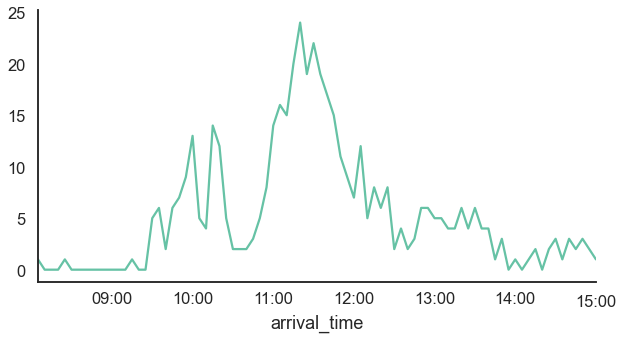

In [216]:
f_1T.size().plot()
# despine() is a function that removes the spines from the right and upper portion of the plot by default
sns.despine()

## Inspecting some trips
From feed.trips I can see that there are two trips that use route_0002: trip_0006 and trip_0024. Below I am filtering the stops that make up these trips and I can tell that trip_0006 starts at stop_0143 and ends at stop_0250, while trip_0024 is the reverse. Also, trip_0006 runs in the morning, while trip_0024 runs in the afternoon.

In [217]:
f[f["trip_id"] == "trip_0006"]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
39,trip_0006,1970-01-01 11:22:17,stop_0143,Barrière Bouteille,19.748932,-72.207581,11:22:17
49,trip_0006,1970-01-01 11:46:39,stop_0260,Morne Rouge,19.708532,-72.273491,11:46:39
51,trip_0006,1970-01-01 11:48:10,stop_0239,Rue Isabelle,19.702581,-72.271904,11:48:10
52,trip_0006,1970-01-01 12:02:20,stop_0088,Diadant,19.648520,-72.284912,12:02:20
53,trip_0006,1970-01-01 12:06:23,stop_0116,Diadant 2,19.645796,-72.288376,12:06:23
54,trip_0006,1970-01-01 12:08:05,stop_0010,Carrefour Dutty,19.642414,-72.292618,12:08:05
55,trip_0006,1970-01-01 12:18:16,stop_0250,Grison Garde,19.617008,-72.288849,12:18:16


In [218]:
f[f["trip_id"] == "trip_0024"]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
4,trip_0024,1970-01-01 14:12:13,stop_0238,Station Esso,19.734182,-72.221748,14:12:13
10,trip_0024,1970-01-01 14:15:47,stop_0038,Le Sage Hôtel,19.737156,-72.220009,14:15:47
13,trip_0024,1970-01-01 14:17:09,stop_0024,Carrefour Nazareth Vertières,19.738056,-72.219612,14:17:09
40,trip_0024,1970-01-01 14:34:08,stop_0143,Barrière Bouteille,19.748932,-72.207581,14:34:08
56,trip_0024,1970-01-01 13:17:29,stop_0250,Grison Garde,19.617008,-72.288849,13:17:29
184,trip_0024,1970-01-01 14:01:46,stop_0228,Monbin Lataille,19.720430,-72.233688,14:01:46
185,trip_0024,1970-01-01 14:30:35,stop_0109,Sainte Philomène,19.744797,-72.210571,14:30:35


# sample date for service 2 on weekdays

In [219]:
# from: http://simplistic.me/playing-with-gtfs.html
import datetime

service_ids_by_date = ptg.read_service_ids_by_date(path)
service_ids = service_ids_by_date[datetime.date(2019, 10, 1)]

print(f"service_ids is {service_ids}")

feed2 = ptg.load_feed(path, view={
    'trips.txt': {
        'service_id': service_ids,
    },
})

service_ids is frozenset({'service_0002'})


In [220]:
len(feed2.trips)

74

In [221]:
len(feed2.stop_times)

1354

In [222]:
len(feed2.stops)

263

In [223]:
feed.stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,stop_0001,NaN,Bonnay Dugal 1,NaN,19.704813,-72.180840,NaN,NaN,0,NaN,NaN,NaN
1,stop_0002,NaN,Cité du Peuple,NaN,19.744087,-72.212227,NaN,NaN,0,NaN,NaN,NaN
2,stop_0003,NaN,Cité Lescot,NaN,19.752174,-72.206665,NaN,NaN,0,NaN,NaN,NaN
3,stop_0004,NaN,Dubreuil,NaN,19.613947,-72.203201,NaN,NaN,0,NaN,NaN,NaN
4,stop_0005,NaN,Pipo-Ville,NaN,19.722265,-72.241341,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
256,stop_0260,NaN,Morne Rouge,NaN,19.708532,-72.273491,NaN,NaN,0,hub_0003,NaN,NaN
257,stop_0261,NaN,Haut Du Cap 1,NaN,19.721527,-72.231148,NaN,NaN,0,NaN,NaN,NaN
258,stop_0262,NaN,Limonade,NaN,19.672407,-72.124825,NaN,NaN,0,hub_0007,NaN,NaN
259,stop_0263,NaN,Carrefour Bas Limbe,NaN,19.703863,-72.379448,NaN,NaN,0,NaN,NaN,NaN


In [224]:
feed2.stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,stop_0001,NaN,Bonnay Dugal 1,NaN,19.704813,-72.180840,NaN,NaN,0,NaN,NaN,NaN
1,stop_0002,NaN,Cité du Peuple,NaN,19.744087,-72.212227,NaN,NaN,0,NaN,NaN,NaN
2,stop_0003,NaN,Cité Lescot,NaN,19.752174,-72.206665,NaN,NaN,0,NaN,NaN,NaN
3,stop_0004,NaN,Dubreuil,NaN,19.613947,-72.203201,NaN,NaN,0,NaN,NaN,NaN
4,stop_0005,NaN,Pipo-Ville,NaN,19.722265,-72.241341,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
258,stop_0260,NaN,Morne Rouge,NaN,19.708532,-72.273491,NaN,NaN,0,hub_0003,NaN,NaN
259,stop_0261,NaN,Haut Du Cap 1,NaN,19.721527,-72.231148,NaN,NaN,0,NaN,NaN,NaN
260,stop_0262,NaN,Limonade,NaN,19.672407,-72.124825,NaN,NaN,0,hub_0007,NaN,NaN
261,stop_0263,NaN,Carrefour Bas Limbe,NaN,19.703863,-72.379448,NaN,NaN,0,NaN,NaN,NaN


In [225]:
feed.trips

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible
0,trip_0004,route_0021,service_0001,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
1,trip_0006,route_0002,service_0001,Grison Garde,NaN,NaN,NaN,shape_0002,NaN
2,trip_0010,route_0003,service_0001,Milot,NaN,NaN,NaN,shape_0003,NaN
3,trip_0014,route_0004,service_0001,Station Trou Du Nord,NaN,NaN,NaN,shape_0004,NaN
4,trip_0018,route_0003,service_0001,Pont Neuf 1,NaN,NaN,NaN,shape_0005,NaN
5,trip_0022,route_0006,service_0001,Madeline,NaN,NaN,NaN,shape_0006,NaN
6,trip_0024,route_0002,service_0001,Barrière Bouteille,NaN,NaN,NaN,shape_0007,NaN
7,trip_0028,route_0008,service_0001,Champin,NaN,NaN,NaN,shape_0008,NaN
8,trip_0030,route_0015,service_0001,Rue 0L,NaN,NaN,NaN,shape_0009,NaN
9,trip_0032,route_0010,service_0001,Ouanaminthe,NaN,NaN,NaN,shape_0010,NaN


In [249]:
feed2.trips[:50]

,trip_id,route_id,service_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible
0,trip_0001,route_0021,service_0002,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
1,trip_0002,route_0021,service_0002,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
2,trip_0003,route_0021,service_0002,Rue 0L,NaN,NaN,NaN,shape_0001,NaN
3,trip_0005,route_0002,service_0002,Grison Garde,NaN,NaN,NaN,shape_0002,NaN
4,trip_0007,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN
5,trip_0008,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN
6,trip_0009,route_0003,service_0002,Milot,NaN,NaN,NaN,shape_0003,NaN
7,trip_0011,route_0004,service_0002,Station Trou Du Nord,NaN,NaN,NaN,shape_0004,NaN
8,trip_0012,route_0004,service_0002,Station Trou Du Nord,NaN,NaN,NaN,shape_0004,NaN
9,trip_0013,route_0004,service_0002,Station Trou Du Nord,NaN,NaN,NaN,shape_0004,NaN


In [227]:
# merge
f2 = (feed2.stop_times[['trip_id', 'arrival_time', 'stop_id']]
     .merge(feed2.stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on='stop_id')
    )

In [228]:
#f["arrival_time2"] = f["arrival_time"].apply(lambda x: str(datetime.timedelta(seconds=x)))
f2.arrival_time = pd.to_datetime(f2.arrival_time, unit='s')

In [229]:
feed.stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,trip_0004,41272.0,41272.0,stop_0032,1,NaN,NaN,NaN,NaN
1,trip_0004,41414.0,41414.0,stop_0072,2,NaN,NaN,NaN,NaN
2,trip_0004,41503.0,41503.0,stop_0238,3,NaN,NaN,NaN,NaN
3,trip_0004,41543.0,41543.0,stop_0229,4,NaN,NaN,NaN,NaN
4,trip_0004,41582.0,41582.0,stop_0038,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
445,trip_0102,40175.0,40175.0,stop_0225,3,NaN,NaN,NaN,NaN
446,trip_0102,40322.0,40322.0,stop_0233,4,NaN,NaN,NaN,NaN
447,trip_0102,40579.0,40579.0,stop_0249,5,NaN,NaN,NaN,NaN
448,trip_0102,40633.0,40633.0,stop_0221,6,NaN,NaN,NaN,NaN


In [230]:
feed2.stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,trip_0001,27464.0,27464.0,stop_0032,1,NaN,NaN,NaN,NaN
1,trip_0001,27633.0,27633.0,stop_0072,2,NaN,NaN,NaN,NaN
2,trip_0001,27778.0,27778.0,stop_0238,3,NaN,NaN,NaN,NaN
3,trip_0001,27818.0,27818.0,stop_0229,4,NaN,NaN,NaN,NaN
4,trip_0001,27842.0,27842.0,stop_0038,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1349,trip_0101,55421.0,55421.0,stop_0225,3,NaN,NaN,NaN,NaN
1350,trip_0101,55571.0,55571.0,stop_0233,4,NaN,NaN,NaN,NaN
1351,trip_0101,55763.0,55763.0,stop_0249,5,NaN,NaN,NaN,NaN
1352,trip_0101,55875.0,55875.0,stop_0221,6,NaN,NaN,NaN,NaN


In [250]:
f[f.stop_id == 'stop_0113']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
106,trip_0010,1970-01-01 12:09:35,stop_0113,Carrefour Clérisse,19.682491,-72.179985,12:09:35


In [251]:
f2[f2.stop_id == 'stop_0113']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon
329,trip_0007,1970-01-01 08:29:43,stop_0113,Carrefour Clérisse,19.682491,-72.179985
330,trip_0008,1970-01-01 12:09:35,stop_0113,Carrefour Clérisse,19.682491,-72.179985
331,trip_0009,1970-01-01 13:41:30,stop_0113,Carrefour Clérisse,19.682491,-72.179985


In [252]:
f[f.stop_id == 'stop_0019']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
104,trip_0010,1970-01-01 12:05:57,stop_0019,Carrefour La Mort,19.696554,-72.180504,12:05:57
105,trip_0082,1970-01-01 11:04:39,stop_0019,Carrefour La Mort,19.696554,-72.180504,11:04:39


In [253]:
f2[f2.stop_id == 'stop_0019']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon
323,trip_0007,1970-01-01 08:26:17,stop_0019,Carrefour La Mort,19.696554,-72.180504
324,trip_0008,1970-01-01 12:05:57,stop_0019,Carrefour La Mort,19.696554,-72.180504
325,trip_0009,1970-01-01 13:39:42,stop_0019,Carrefour La Mort,19.696554,-72.180504
326,trip_0079,1970-01-01 07:42:43,stop_0019,Carrefour La Mort,19.696554,-72.180504
327,trip_0080,1970-01-01 11:04:39,stop_0019,Carrefour La Mort,19.696554,-72.180504
328,trip_0081,1970-01-01 13:08:42,stop_0019,Carrefour La Mort,19.696554,-72.180504


In [258]:
f[f.stop_id == 'stop_0084']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon,arrival_time2
387,trip_0082,1970-01-01 11:14:57,stop_0084,Carrefour Barrière Battant,19.623344,-72.197113,11:14:57


In [259]:
f2[f2.stop_id == 'stop_0084']

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon
1165,trip_0079,1970-01-01 07:55:50,stop_0084,Carrefour Barrière Battant,19.623344,-72.197113
1166,trip_0080,1970-01-01 11:14:57,stop_0084,Carrefour Barrière Battant,19.623344,-72.197113
1167,trip_0081,1970-01-01 13:19:33,stop_0084,Carrefour Barrière Battant,19.623344,-72.197113


In [254]:
# can I merge f1 and f2 based on arrival time?
f3 = (f[['trip_id', 'arrival_time', 'stop_id']]
     .merge(f2[['trip_id','arrival_time','stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on='arrival_time')
    )

In [256]:
len(f)

450

In [257]:
len(f2)

1354

In [255]:
f3

,trip_id_x,arrival_time,stop_id_x,trip_id_y,stop_id_y,stop_name,stop_lat,stop_lon
0,trip_0004,1970-01-01 11:27:52,stop_0032,trip_0002,stop_0032,Zo Vincent,19.730322,-72.226074
1,trip_0004,1970-01-01 11:30:14,stop_0072,trip_0002,stop_0072,Charrier 1,19.732510,-72.224388
2,trip_0094,1970-01-01 11:30:47,stop_0072,trip_0092,stop_0072,Charrier 1,19.732510,-72.224388
3,trip_0004,1970-01-01 11:31:43,stop_0238,trip_0002,stop_0238,Station Esso,19.734182,-72.221748
4,trip_0024,1970-01-01 14:12:13,stop_0238,trip_0023,stop_0238,Station Esso,19.734182,-72.221748
...,...,...,...,...,...,...,...,...
474,trip_0102,1970-01-01 11:04:26,stop_0074,trip_0100,stop_0074,Cormier,19.781218,-72.227089
475,trip_0102,1970-01-01 11:09:35,stop_0225,trip_0100,stop_0225,Haut Du Croix,19.780752,-72.217453
476,trip_0102,1970-01-01 11:12:02,stop_0233,trip_0100,stop_0233,Fort Bougeois,19.773886,-72.211227
477,trip_0102,1970-01-01 11:17:13,stop_0221,trip_0100,stop_0221,Calvaire Ban Du Nord,19.764235,-72.205688


In [235]:
#f.loc[(f.stop_id == "stop_0052") | (f.stop_id == "stop_0132")].sort_values("arrival_time")

In [236]:
f2.sort_values("arrival_time")[:5]

,trip_id,arrival_time,stop_id,stop_name,stop_lat,stop_lon
184,trip_0059,1970-01-01 07:07:33,stop_0132,Rue 5A,19.755535,-72.202240
192,trip_0059,1970-01-01 07:09:53,stop_0052,Rue 2A,19.754192,-72.203186
530,trip_0059,1970-01-01 07:10:29,stop_0207,Rue 0A,19.752293,-72.204178
181,trip_0019,1970-01-01 07:11:04,stop_0132,Rue 5A,19.755535,-72.202240
204,trip_0059,1970-01-01 07:11:11,stop_0046,Pont Neuf,19.750965,-72.204582


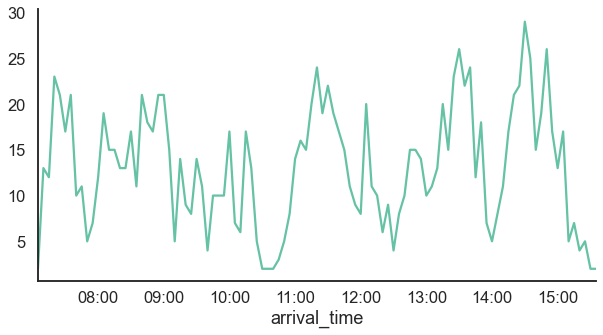

In [237]:
f_1T = f2.set_index(['arrival_time']).resample('5T')
f_1T.size().plot()
sns.despine()

# Inspect how many services there are

In [238]:
# Extract service ids and then trip counts by those dates
try:
    service_ids_by_date = ptg.read_service_ids_by_date(path)
    trip_counts_by_date = ptg.read_trip_counts_by_date(path)

# Raised by partridge if no valid dates returned
except AssertionError:
    # Make sure we have some valid values returned in trips
    raise InvalidGTFS('No valid trip counts by date '
                      'were identified in GTFS.')

In [239]:
service_ids_by_date

{datetime.date(2019, 6, 29): frozenset({'service_0001'}),
 datetime.date(2019, 6, 30): frozenset({'service_0001'}),
 datetime.date(2019, 7, 6): frozenset({'service_0001'}),
 datetime.date(2019, 7, 7): frozenset({'service_0001'}),
 datetime.date(2019, 7, 13): frozenset({'service_0001'}),
 datetime.date(2019, 7, 14): frozenset({'service_0001'}),
 datetime.date(2019, 7, 20): frozenset({'service_0001'}),
 datetime.date(2019, 7, 21): frozenset({'service_0001'}),
 datetime.date(2019, 7, 27): frozenset({'service_0001'}),
 datetime.date(2019, 7, 28): frozenset({'service_0001'}),
 datetime.date(2019, 8, 3): frozenset({'service_0001'}),
 datetime.date(2019, 8, 4): frozenset({'service_0001'}),
 datetime.date(2019, 8, 10): frozenset({'service_0001'}),
 datetime.date(2019, 8, 11): frozenset({'service_0001'}),
 datetime.date(2019, 8, 17): frozenset({'service_0001'}),
 datetime.date(2019, 8, 18): frozenset({'service_0001'}),
 datetime.date(2019, 8, 24): frozenset({'service_0001'}),
 datetime.date(201

I can tell there are two services. Also manually opening the gtfs calendar txt file, I can tell that service one is one the weekend and that service 2 is on the weekdays.
so we should probably run two different analysis.

In [240]:
trip_counts_by_date

{datetime.date(2020, 5, 23): 26,
 datetime.date(2020, 1, 11): 26,
 datetime.date(2020, 1, 4): 26,
 datetime.date(2020, 6, 6): 26,
 datetime.date(2019, 11, 10): 26,
 datetime.date(2020, 5, 2): 26,
 datetime.date(2019, 7, 21): 26,
 datetime.date(2020, 6, 20): 26,
 datetime.date(2020, 4, 25): 26,
 datetime.date(2019, 11, 24): 26,
 datetime.date(2019, 8, 17): 26,
 datetime.date(2019, 12, 28): 26,
 datetime.date(2019, 7, 27): 26,
 datetime.date(2019, 7, 7): 26,
 datetime.date(2020, 5, 24): 26,
 datetime.date(2019, 9, 15): 26,
 datetime.date(2019, 10, 26): 26,
 datetime.date(2019, 10, 20): 26,
 datetime.date(2020, 7, 25): 26,
 datetime.date(2019, 11, 23): 26,
 datetime.date(2019, 8, 25): 26,
 datetime.date(2019, 12, 14): 26,
 datetime.date(2019, 7, 28): 26,
 datetime.date(2020, 2, 2): 26,
 datetime.date(2020, 2, 15): 26,
 datetime.date(2020, 1, 12): 26,
 datetime.date(2019, 12, 7): 26,
 datetime.date(2019, 6, 30): 26,
 datetime.date(2020, 5, 3): 26,
 datetime.date(2020, 6, 7): 26,
 datetime.

Looking at the trip counts, service 1 always has 29 trips, and service 2 always has 74 trips

In [241]:
# Choose the service id that has the most trips associated with it
# In the case of dictionaries, max() returns the largest key. Let's use the key parameter so that we can find the dictionary's key having the largest value.
selected_date, trip_count = max(trip_counts_by_date.items(), key=lambda p: p[1])

In [242]:
selected_date

datetime.date(2020, 3, 13)

In [243]:
trip_count

74

In [244]:
print('Selected_date: {}'.format(selected_date))
print('Number of trips on that date: {}'.format(trip_count))

all_service_ids = '\n\t'.join(service_ids_by_date[selected_date])
print('\nAll related service IDs: \n\t{}'.format(all_service_ids))

sub = service_ids_by_date[selected_date]
feed_query = {'trips.txt': {'service_id': sub}}

Selected_date: 2020-03-13
Number of trips on that date: 74

All related service IDs: 
	service_0002


In [245]:
sub

frozenset({'service_0002'})

In [246]:
feed_query

{'trips.txt': {'service_id': frozenset({'service_0002'})}}